# Classification with Logistic Regression

The goal of this task is to predict discrete labels (like Yes/No, 0/1) for given input data. Logistic Regression is used for binary classification—i.e., when the target variable has only two possible outcomes.

## 1. Import Libraries and Load Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


## Explore Dataset

In [3]:
data = pd.read_csv('diabetes.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Predict Variable (desired target)

y - has the patients which are truly categorical (binary: '1','0')

The outcome column of the dataset can be used as desired target.

In [7]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

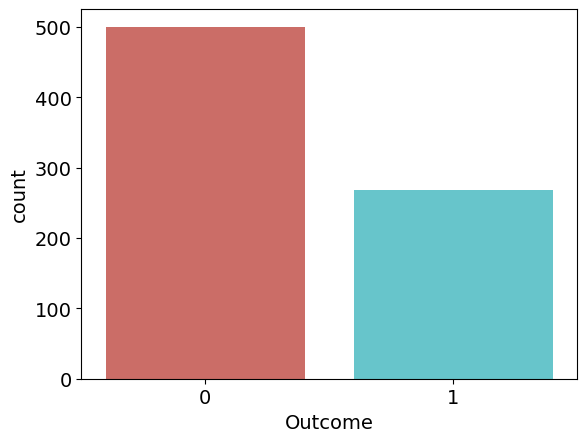

<Figure size 640x480 with 0 Axes>

In [9]:
sns.countplot(x='Outcome',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


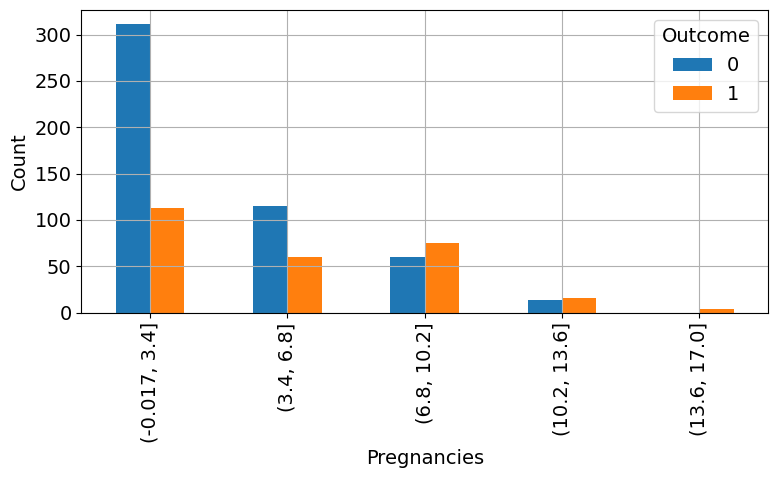

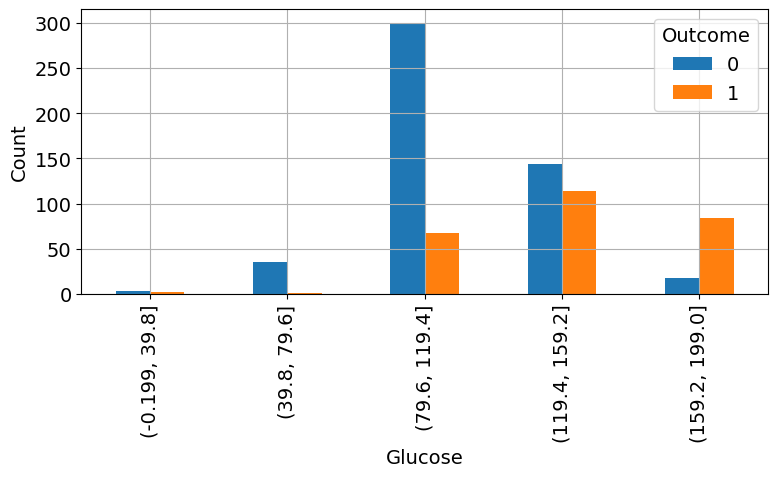

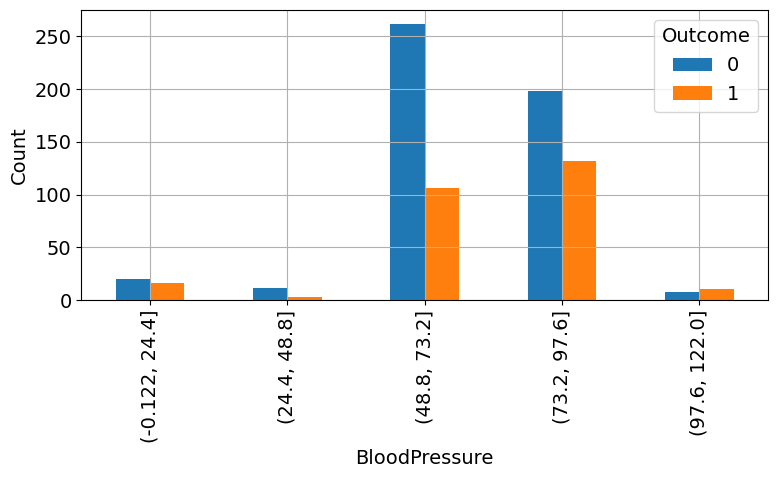

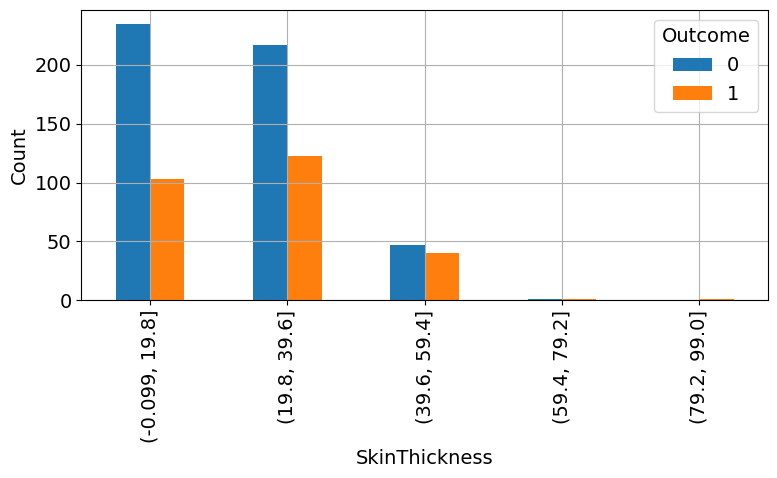

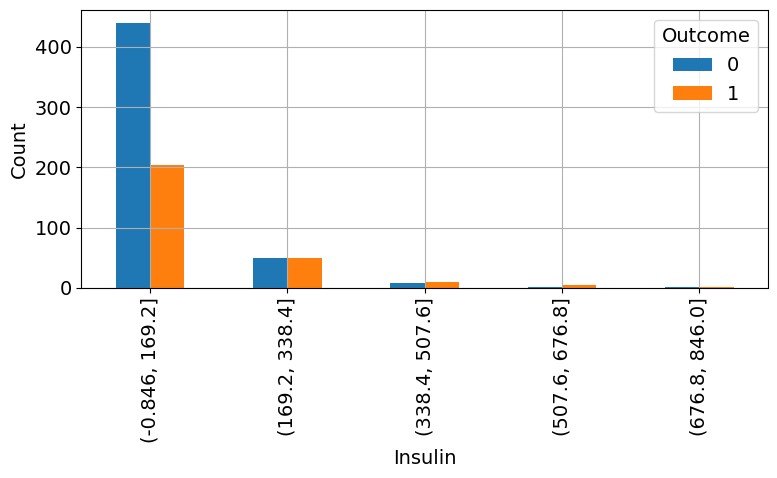

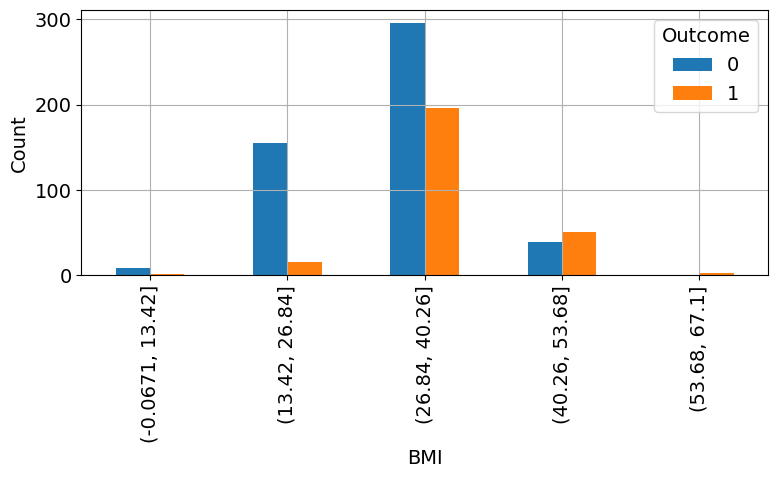

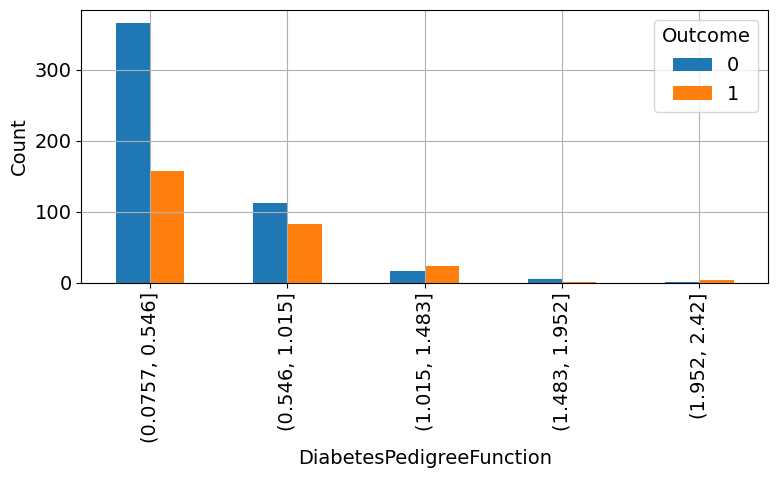

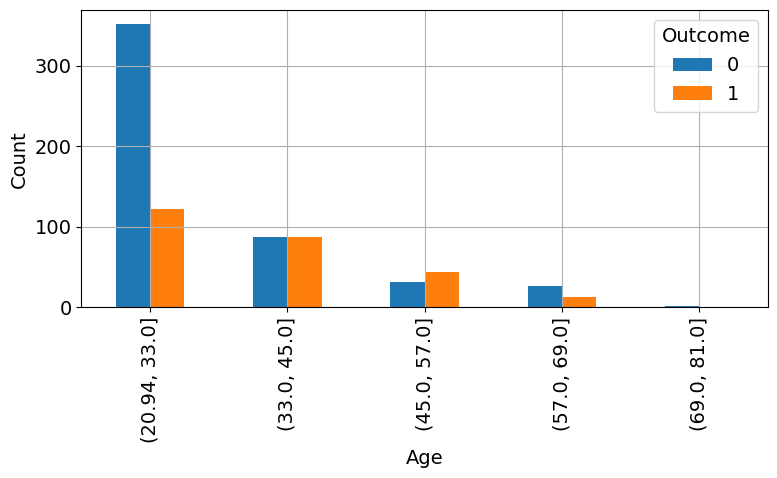

In [23]:
def plot_feature_vs_outcome(feature, bins=5):
    if data[feature].nunique() > 10:   
        binned = pd.cut(data[feature], bins)
        cross_tab = pd.crosstab(binned, data["Outcome"])
    else:
        cross_tab = pd.crosstab(data[feature], data["Outcome"])
    
    cross_tab.plot(kind='bar', figsize=(8,5))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
            'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in features:
    plot_feature_vs_outcome(feature, bins=5)

- Glucose → Highest positive correlation with diabetes (Outcome) — most significant predictor.
- BMI → Also positively correlated — higher BMI tends to indicate higher diabetes risk.
- Age → Moderate correlation — older individuals are more likely to be diabetic.
- DiabetesPedigreeFunction → Reflects family history and has a noticeable impact.
- BloodPressure, SkinThickness, and Insulin show weak correlations with the outcome.
- Pregnancies has a mild positive effect.

The Glucose level is the strongest single predictor of diabetes in this dataset.
Other useful predictors include BMI, Age, and DiabetesPedigreeFunction.

## 2. Train-Test Split

In this dataset there are 768 rows in which training set has used 614 rows (80%) and testing set has used 154 rows (20%).


In [13]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.Fit Logistic Regression model

To fit a logistic regression model, the dataset is prepared by separating the features (independent variables) and the target (dependent variable). The Outcome column, which indicates whether a person is diabetic (1) or not (0), serves as the target variable for binary classification.

In [16]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## 4. Model Evaluation with confusion matrix

In [17]:
y_pred = model.predict(X_test_scaled)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



### ROC Curve

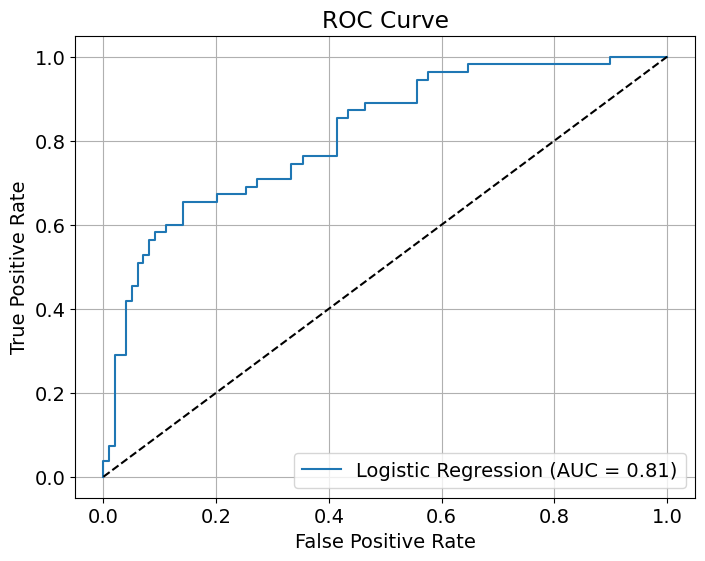

In [19]:
y_scores = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## 5. Sigmoid Function

Then these learned parameters are used to create a linear combination of the input features and then applies the sigmoid function to output probabilities that indicate the likelihood of the target being class 1. These probabilities are then thresholded (typically at 0.5) to classify each instance as diabetic or non-diabetic.

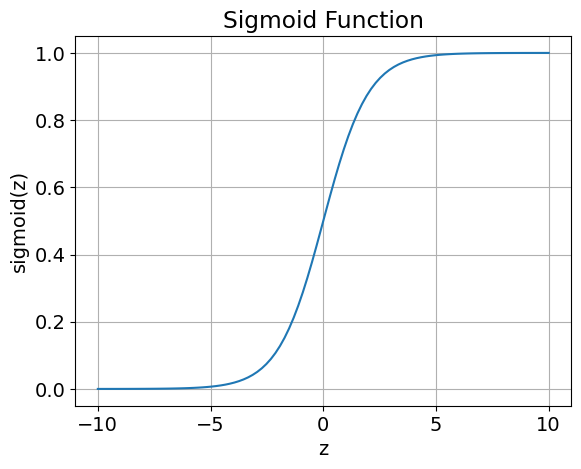

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()